### Ephemeris

Some experiments with the pyephem library


In [17]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ephem
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import seaborn as sns
from geopy.geocoders import Nominatim
import math

sns.set()


In [18]:
geolocator = Nominatim(user_agent="astronomy_notebook")
sun = ephem.Sun()
rigel = ephem.star("Rigel")

In [19]:
cities = ["Cologne", "Stockholm", "London", "Rome", "Bergen", "Cape Town"]
city_geocodes = [geolocator.geocode(city) for city in cities]
obs = ephem.Observer()
city_geocodes

[Location(Köln, Nordrhein-Westfalen, Deutschland, (50.938361, 6.959974, 0.0)),
 Location(Stockholm, Stockholms kommun, Stockholms län, 111 29, Sverige, (59.3251172, 18.0710935, 0.0)),
 Location(London, Greater London, England, United Kingdom, (51.5073219, -0.1276474, 0.0)),
 Location(Roma, Roma Capitale, Lazio, Italia, (41.8933203, 12.4829321, 0.0)),
 Location(Bergen, Vestland, Norge, (60.3943055, 5.3259192, 0.0)),
 Location(Cape Town, City of Cape Town, Western Cape, 8001, South Africa, (-33.928992, 18.417396, 0.0))]

[0.8890421150194713, 0.12147446215319982]


,time,alt,az,next_rising
0,2021-03-15 01:00:00,-38.429636,25.487153,2021/3/15 05:45:31
1,2021-03-15 02:00:00,-33.102713,42.796975,2021/3/15 05:45:31
2,2021-03-15 03:00:00,-25.813319,57.873928,2021/3/15 05:45:31
3,2021-03-15 04:00:00,-17.276280,71.146672,2021/3/15 05:45:31
4,2021-03-15 05:00:00,-8.054281,83.282464,2021/3/15 05:45:31
5,2021-03-15 06:00:00,1.711643,94.956281,2021/3/16 05:43:18
6,2021-03-15 07:00:00,10.753644,106.810594,2021/3/16 05:43:18
7,2021-03-15 08:00:00,19.413310,119.474229,2021/3/16 05:43:18
8,2021-03-15 09:00:00,27.007020,133.550375,2021/3/16 05:43:18
9,2021-03-15 10:00:00,32.901049,149.482365,2021/3/16 05:43:18


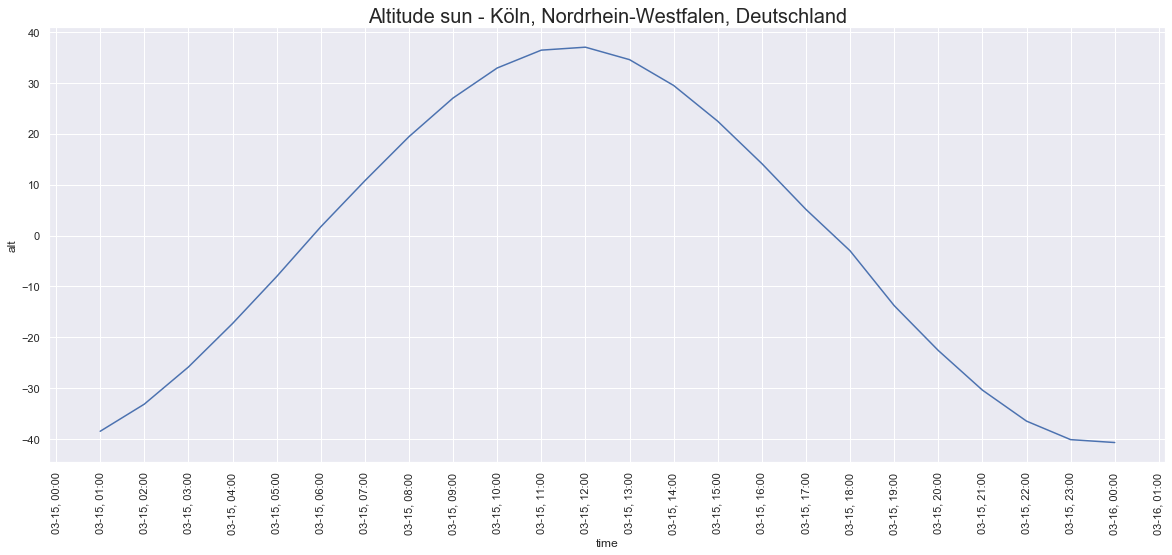

In [7]:
hour_interval = 1
days = 1

pos_list = []



geocode = city_geocodes[0]

obs.lat = str(geocode.latitude)
obs.lon = str(geocode.longitude)
obs.date = '2021/03/15 0:00'
print([obs.lat, obs.lon])
for i in range(int(24*days//hour_interval)):
    obs.date = obs.date + (hour_interval*ephem.hour)
    sun.compute(obs)
    pos_list.append({'time':pd.to_datetime(str(obs.date)), 'alt':math.degrees(sun.alt), 'az':math.degrees(sun.az), 'next_rising':str(obs.next_rising(sun))})
pos_list

df = pd.DataFrame(pos_list)
fig, ax = plt.subplots(1, 1, figsize=(20,8))
ax = sns.lineplot(data=df, x='time',y='alt')
date_form = DateFormatter("%m-%d, %H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_tick_params(rotation=90)
plt.title("Altitude sun - " + geocode.address, fontsize=20)
df

In [8]:
hour_interval = 24
days = 365

pos_list = []


obs.lat = str(geocode.latitude)
obs.lon = str(geocode.longitude)
obs.date = '2020/12/21 12:00'
print([obs.lat, obs.lon])
for i in range(int(24*days//hour_interval)):
    obs.date = obs.date + (hour_interval*ephem.hour)
    sun.compute(obs)
    pos_list.append({'time':pd.to_datetime(str(obs.date)), 'alt':math.degrees(sun.alt), 'az':math.degrees(sun.az), 'next_setting':pd.to_datetime(str(obs.next_setting(sun))), 'previous_rising':pd.to_datetime(str(obs.previous_rising(sun)))})
pos_list

df = pd.DataFrame(pos_list)
df['sun_hours'] = (df.next_setting - df.previous_rising).dt.seconds / 3600
df

[0.8890421150194713, 0.12147446215319982]


,time,alt,az,next_setting,previous_rising,sun_hours
0,2020-12-22 12:00:00,15.408555,186.905955,2020-12-22 15:29:08,2020-12-22 07:32:47,7.939167
1,2020-12-23 12:00:00,15.430217,186.789104,2020-12-23 15:29:44,2020-12-23 07:33:12,7.942222
2,2020-12-24 12:00:00,15.459508,186.673059,2020-12-24 15:30:22,2020-12-24 07:33:34,7.946667
3,2020-12-25 12:00:00,15.496412,186.557916,2020-12-25 15:31:04,2020-12-25 07:33:53,7.953056
4,2020-12-26 12:00:00,15.540880,186.443769,2020-12-26 15:31:48,2020-12-26 07:34:09,7.960833
...,...,...,...,...,...,...
360,2021-12-17 12:00:00,15.419400,187.531532,2021-12-17 15:26:54,2021-12-17 07:29:42,7.953333
361,2021-12-18 12:00:00,15.400951,187.412864,2021-12-18 15:27:12,2021-12-18 07:30:23,7.946944
362,2021-12-19 12:00:00,15.390137,187.294401,2021-12-19 15:27:34,2021-12-19 07:31:02,7.942222
363,2021-12-20 12:00:00,15.386963,187.176253,2021-12-20 15:27:59,2021-12-20 07:31:37,7.939444


In [10]:
hour_interval = 24
days = 365

pos_list = []

for code in city_geocodes:
    obs.lat = str(code.latitude)
    obs.lon = str(code.longitude)
    obs.date = '2020/12/21 12:00'
    for i in range(int(24*days//hour_interval)):
        obs.date = obs.date + (hour_interval*ephem.hour)
        sun.compute(obs)
        pos_list.append({'time':pd.to_datetime(str(obs.date)), 'alt':math.degrees(sun.alt), 'az':math.degrees(sun.az), 'next_setting':pd.to_datetime(str(obs.next_setting(sun))), 'previous_rising':pd.to_datetime(str(obs.previous_rising(sun))), 'name':code.address})


df = pd.DataFrame(pos_list)
df['sun_hours'] = (df.next_setting - df.previous_rising).dt.seconds / 3600
df

,time,alt,az,next_setting,previous_rising,name,sun_hours
0,2020-12-22 12:00:00,15.408555,186.905955,2020-12-22 15:29:08,2020-12-22 07:32:47,"Köln, Nordrhein-Westfalen, Deutschland",7.939167
1,2020-12-23 12:00:00,15.430217,186.789104,2020-12-23 15:29:44,2020-12-23 07:33:12,"Köln, Nordrhein-Westfalen, Deutschland",7.942222
2,2020-12-24 12:00:00,15.459508,186.673059,2020-12-24 15:30:22,2020-12-24 07:33:34,"Köln, Nordrhein-Westfalen, Deutschland",7.946667
3,2020-12-25 12:00:00,15.496412,186.557916,2020-12-25 15:31:04,2020-12-25 07:33:53,"Köln, Nordrhein-Westfalen, Deutschland",7.953056
4,2020-12-26 12:00:00,15.540880,186.443769,2020-12-26 15:31:48,2020-12-26 07:34:09,"Köln, Nordrhein-Westfalen, Deutschland",7.960833
...,...,...,...,...,...,...,...
2185,2021-12-17 12:00:00,70.047688,296.866768,2021-12-17 17:55:10,2021-12-17 03:29:53,"Cape Town, City of Cape Town, Western Cape, 80...",14.421389
2186,2021-12-18 12:00:00,70.155141,296.994274,2021-12-18 17:55:44,2021-12-18 03:30:16,"Cape Town, City of Cape Town, Western Cape, 80...",14.424444
2187,2021-12-19 12:00:00,70.258324,297.142326,2021-12-19 17:56:18,2021-12-19 03:30:41,"Cape Town, City of Cape Town, Western Cape, 80...",14.426944
2188,2021-12-20 12:00:00,70.357109,297.311031,2021-12-20 17:56:50,2021-12-20 03:31:07,"Cape Town, City of Cape Town, Western Cape, 80...",14.428611


Text(0.5, 1.0, 'Sun hours for different cities over one year')

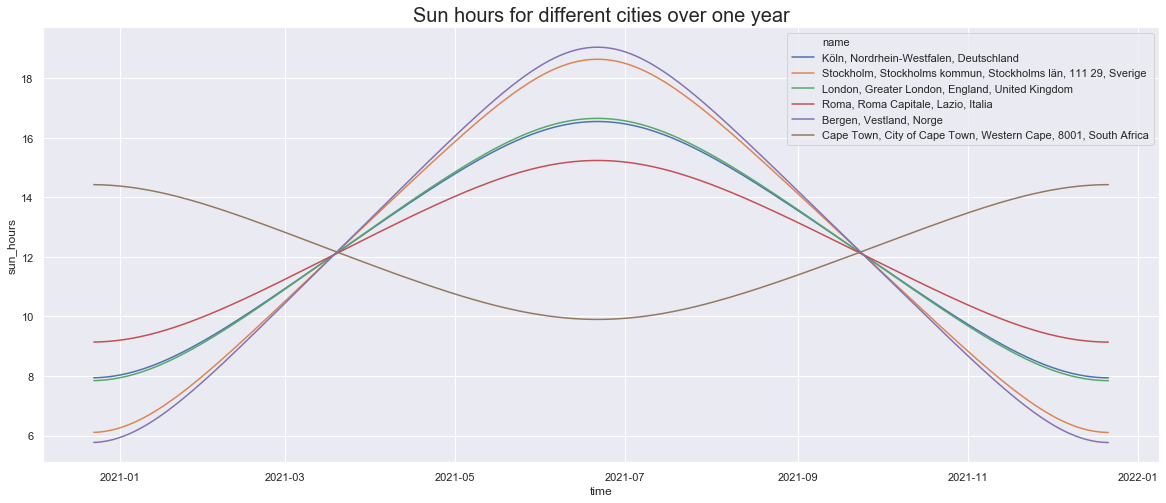

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
sns.lineplot(data=df, x='time', y='sun_hours', hue='name')
plt.title("Sun hours for different cities over one year", fontsize=20)